Missing values before handling:
 Patient_ID         0
age                0
gender            21
blood_pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64
Number of duplicate records: 5


C:\Users\palla\AppData\Local\Temp\ipykernel_19004\1347377345.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\palla\AppData\Local\Temp\ipykernel_19004\1347377345.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

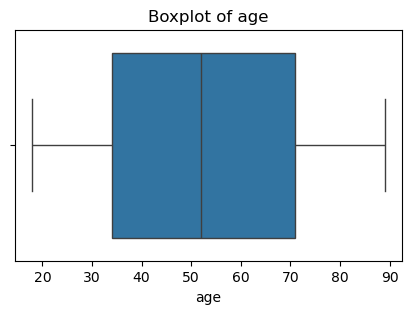

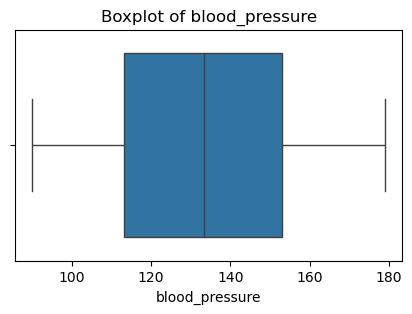

Missing values after handling:
 Patient_ID         0
age                0
blood_pressure     0
Cholesterol       20
Diabetes           0
Heart_Disease      0
gender_Male        0
dtype: int64
Duplicate records after cleaning: 0
Data types:
 Patient_ID          int64
age               float64
blood_pressure    float64
Cholesterol       float64
Diabetes           object
Heart_Disease      object
gender_Male          bool
dtype: object
Cleaned dataset saved as cleaned_healthcare_data.csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("healthcare_data.csv")

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Rename columns to match expected names
df.rename(columns={
    'Age': 'age',
    'Gender': 'gender',
    'Blood_Pressure': 'blood_pressure'
}, inplace=True)

# Handle Missing Data
print("Missing values before handling:\n", df.isnull().sum())

df['age'].fillna(df['age'].median(), inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['blood_pressure'].fillna(df['blood_pressure'].mean(), inplace=True)

# Detect and Handle Duplicates
duplicates = df.duplicated()
print("Number of duplicate records:", duplicates.sum())
df = df.drop_duplicates()

# Detect and Handle Outliers
numeric_columns = ['age', 'blood_pressure']
for col in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Handling outliers using capping
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Standardize and Normalize Data
categorical_columns = ['gender']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

scaler = MinMaxScaler()
df[['age', 'blood_pressure']] = scaler.fit_transform(df[['age', 'blood_pressure']])

# Data Validation
print("Missing values after handling:\n", df.isnull().sum())
print("Duplicate records after cleaning:", df.duplicated().sum())
print("Data types:\n", df.dtypes)

# Save the cleaned dataset
df.to_csv("cleaned_healthcare_data.csv", index=False)
print("Cleaned dataset saved as cleaned_healthcare_data.csv")
